<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [229]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [230]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

- Равномерное распределение

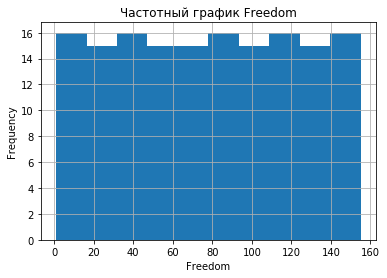

In [231]:
df['Freedom'].hist()
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.title('Частотный график Freedom')
plt.grid(True)

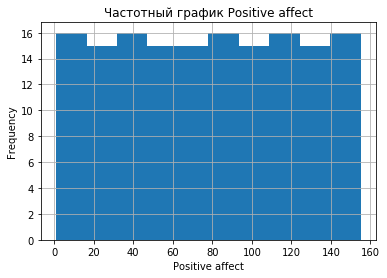

In [232]:
df['Positive affect'].hist()
plt.xlabel('Positive affect')
plt.ylabel('Frequency')
plt.title('Частотный график Positive affect')
plt.grid(True)

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [247]:
df[df['Freedom'].isnull()] #без фильтрации дисперсия и ст.откл. давали ошибку, проверил данные
freedom = df['Freedom'].fillna(0) #поправили ошибочные данные

In [248]:
print('Медиана', statistics.median(freedom))
print('Мат.ожидание', freedom.mean()) 
print('Cтандартное отклонение', statistics.pstdev(freedom))
print('Дисперсия', statistics.pvariance(freedom))
print('Минимум', min(freedom))
print('Максимум',max(freedom))
print('Размах', max(freedom) - min(freedom))
print('Мода', freedom.mode()) 

Медиана 77.5
Мат.ожидание 77.5
Cтандартное отклонение 45.032395746469746
Дисперсия 2027.9166666666667
Минимум 0.0
Максимум 155.0
Размах 155.0
Мода 0        0.0
1        1.0
2        2.0
3        3.0
4        4.0
       ...  
151    151.0
152    152.0
153    153.0
154    154.0
155    155.0
Length: 156, dtype: float64


Почему нельзя найти моду?

In [249]:
#видимо значения в сете уникальные, частотность неприменима

Text(0, 0.5, 'Position')

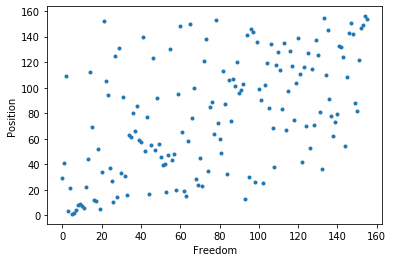

In [236]:
plt.scatter(freedom, df['Ladder'], marker = '.')
plt.xlabel('Freedom')
plt.ylabel('Position')

In [237]:
out = df[(df['Freedom'] < 45) & (df['Ladder'] > 100)]
out.head() #страны с высоким уровнем счастья, но низким уровнем свобод. Рейтинг может быть искажен внешним влиянием.

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
104,Laos,105,59,5.0,112.0,120.0,22.0,27.0,34.0,102.0,112.0
108,Cambodia,109,135,27.0,142.0,109.0,2.0,94.0,61.0,116.0,102.0
111,Somalia,112,74,2.0,18.0,145.0,14.0,16.0,96.0,NaN,144.0
124,Bangladesh,125,52,145.0,68.0,126.0,27.0,36.0,107.0,119.0,90.0
130,Myanmar,131,70,45.0,86.0,96.0,29.0,24.0,1.0,106.0,110.0


In [238]:
df2 = df.drop(df.index[[104,108,111,124,130]])

Text(0, 0.5, 'Position')

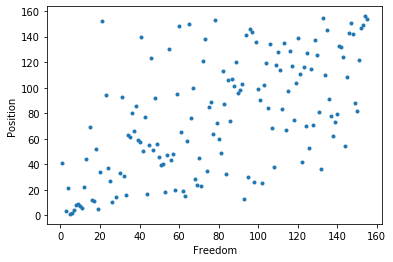

In [253]:
freedom = df2['Freedom'].fillna(0)

plt.scatter(df2['Freedom'], df2['Ladder'], marker = '.')
plt.xlabel('Freedom')
plt.ylabel('Position')

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Text(0.5, 1.0, 'График корреляции Fredom и Positive Affect')

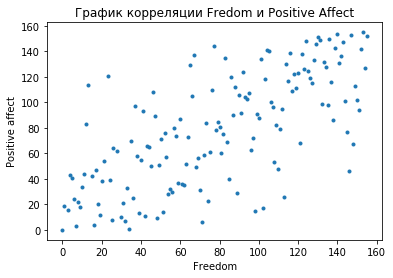

In [254]:
pos = df2['Positive affect'].fillna(0)

plt.scatter(freedom, pos, marker = '.')
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('График корреляции Fredom и Positive Affect')

In [255]:
from scipy.stats import pearsonr
corr, pval = pearsonr(x = freedom, y = pos)
print('Коэффициент Пирсона', corr)

# Положительная линейная корреляция. Возрастание уровня свобод коррелирует с возрастанием места в рейтинге.

Коэффициент Пирсона 0.6939322496355811


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [256]:
freedom = df2['Freedom'].fillna(0)
freedom.mean()

freedom_norm = freedom - freedom.mean()
freedom_norm.mean()

5.816098154963469e-14

In [257]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_norm).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

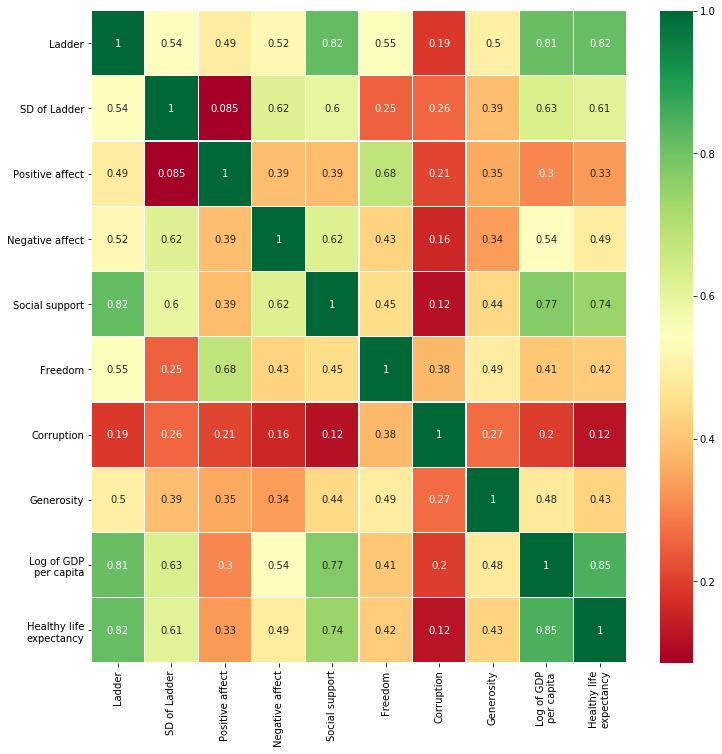

In [258]:
import seaborn as sns
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


Загрузить таблицу цен на авокадо: 

In [259]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
avocado = pd.read_csv(url)
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

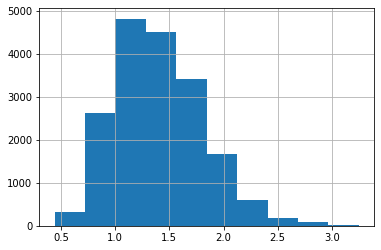

In [260]:
avocado['AveragePrice'].hist()#нормальное распределение, смещенное влево

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [261]:
types = avocado[['4046', '4225', '4770', 'AveragePrice']]
types.head()

,4046,4225,4770,AveragePrice
0,1036.74,54454.85,48.16,1.33
1,674.28,44638.81,58.33,1.35
2,794.70,109149.67,130.50,0.93
3,1132.00,71976.41,72.58,1.08
4,941.48,43838.39,75.78,1.28


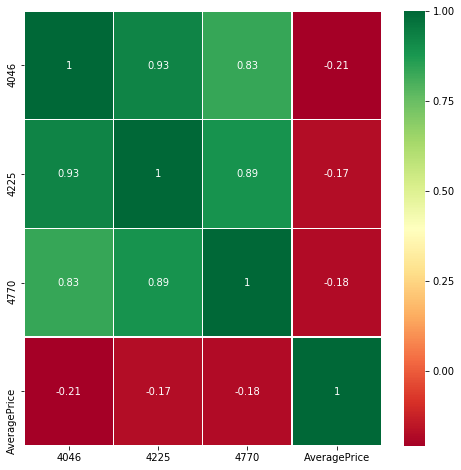

In [265]:
import seaborn as sns
ax = sns.heatmap(types.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,8)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Корреляции скороее нет. Судя по знаку есть некая тенденция к обратной зависимости.